In [42]:
#importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import seaborn as sns 
import matplotlib.patches as mpatches

1- Fonte do arquivo: https://www.kaggle.com/datasets/thedevastator/1-5-million-beer-reviews-from-beer-advocate

In [43]:
#lendo o arquivo
cervejas_data = pd.read_csv("C:/Users/Caroline/OneDrive/Área de Trabalho/Rol/projetos/cervejas/beer_reviews.csv")
cervejas_data.head()

,index,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


In [44]:
cervejas_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 14 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   index               1586614 non-null  int64  
 1   brewery_id          1586614 non-null  int64  
 2   brewery_name        1586599 non-null  object 
 3   review_time         1586614 non-null  int64  
 4   review_overall      1586614 non-null  float64
 5   review_aroma        1586614 non-null  float64
 6   review_appearance   1586614 non-null  float64
 7   review_profilename  1586266 non-null  object 
 8   beer_style          1586614 non-null  object 
 9   review_palate       1586614 non-null  float64
 10  review_taste        1586614 non-null  float64
 11  beer_name           1586614 non-null  object 
 12  beer_abv            1518829 non-null  float64
 13  beer_beerid         1586614 non-null  int64  
dtypes: float64(6), int64(4), object(4)
memory usage: 169.5+ MB


In [45]:
cervejas_data.describe()

,index,brewery_id,review_time,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid
count,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.518829e+06,1.586614e+06
mean,7.933065e+05,3.130099e+03,1.224089e+09,3.815581e+00,3.735636e+00,3.841642e+00,3.743701e+00,3.792860e+00,7.042387e+00,2.171279e+04
std,4.580162e+05,5.578104e+03,7.654427e+07,7.206219e-01,6.976167e-01,6.160928e-01,6.822184e-01,7.319696e-01,2.322526e+00,2.181834e+04
min,0.000000e+00,1.000000e+00,8.406720e+08,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e-02,3.000000e+00
25%,3.966532e+05,1.430000e+02,1.173224e+09,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,5.200000e+00,1.717000e+03
50%,7.933065e+05,4.290000e+02,1.239203e+09,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,6.500000e+00,1.390600e+04
75%,1.189960e+06,2.372000e+03,1.288568e+09,4.500000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.500000e+00,8.500000e+00,3.944100e+04
max,1.586613e+06,2.800300e+04,1.326285e+09,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.770000e+01,7.731700e+04


In [46]:
print(cervejas_data.isnull().sum())

index                     0
brewery_id                0
brewery_name             15
review_time               0
review_overall            0
review_aroma              0
review_appearance         0
review_profilename      348
beer_style                0
review_palate             0
review_taste              0
beer_name                 0
beer_abv              67785
beer_beerid               0
dtype: int64


Limpeza inicial dos dados
Vamos remover a coluna de "review_profilename" que contém o nome dos perfis que participaram da classificação das cervejas.
Este dado não é necessário para a análise e o modelo de machine learning que vamos desenvolver. Além disso, é necessário limpar a coluna "brewery_name" e "beer_abv"

In [47]:
#removendo a coluna com informações dos perfis de usuários
cervejas_data = cervejas_data.drop(columns = ["review_profilename"])
cervejas_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 13 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   index              1586614 non-null  int64  
 1   brewery_id         1586614 non-null  int64  
 2   brewery_name       1586599 non-null  object 
 3   review_time        1586614 non-null  int64  
 4   review_overall     1586614 non-null  float64
 5   review_aroma       1586614 non-null  float64
 6   review_appearance  1586614 non-null  float64
 7   beer_style         1586614 non-null  object 
 8   review_palate      1586614 non-null  float64
 9   review_taste       1586614 non-null  float64
 10  beer_name          1586614 non-null  object 
 11  beer_abv           1518829 non-null  float64
 12  beer_beerid        1586614 non-null  int64  
dtypes: float64(6), int64(4), object(3)
memory usage: 157.4+ MB


In [48]:
#descrição das cervejarias e contagem de cervjas por cervejaria
print(cervejas_data['brewery_name'].unique().shape)
print(cervejas_data['brewery_name'].value_counts())

(5743,)
Boston Beer Company (Samuel Adams)    39444
Dogfish Head Brewery                  33839
Stone Brewing Co.                     33066
Sierra Nevada Brewing Co.             28751
Bell's Brewery, Inc.                  25191
                                      ...  
Brauerei Stolz GmbH & Co. KG              1
Hausbrauerei Düll                         1
Browar Grybów                             1
Staro&#269;eský Pivovárek Dobruka        1
Spire Brewery                             1
Name: brewery_name, Length: 5742, dtype: int64


In [49]:
#descrição dos tipos de cerveja
print(cervejas_data['beer_style'].unique().shape)
print(cervejas_data['beer_style'].value_counts())

(104,)
American IPA                        117586
American Double / Imperial IPA       85977
American Pale Ale (APA)              63469
Russian Imperial Stout               54129
American Double / Imperial Stout     50705
                                     ...  
Gose                                   686
Faro                                   609
Roggenbier                             466
Kvass                                  297
Happoshu                               241
Name: beer_style, Length: 104, dtype: int64


In [50]:
#removendo os dados nulos
cervejas_data.dropna(inplace = True)

In [51]:
#chegando os dados
print(cervejas_data.isnull().sum())

index                0
brewery_id           0
brewery_name         0
review_time          0
review_overall       0
review_aroma         0
review_appearance    0
beer_style           0
review_palate        0
review_taste         0
beer_name            0
beer_abv             0
beer_beerid          0
dtype: int64


In [52]:
#Visualizando as 150 melhores cervejarias 

#pontuação média 

med_cervejarias = cervejas_data.groupby("brewery_name").agg({'review_overall':'mean', 'beer_name':'count'}).reset_index()
med_cervejarias = med_cervejarias.rename(columns={'brewery_name': 'Cervejaria', 'review_overall':'Classificação' , 'beer_name': 'nº de cervejas'})
med_cervejarias = med_cervejarias.sort_values(by = 'Classificação', ascending = False).reset_index(drop=True)


In [53]:
top_cervejarias = med_cervejarias.head(10)
top_cervejarias.head()

,Cervejaria,Classificação,nº de cervejas
0,Thai Me Up,5.0,1
1,Kunino Cho,5.0,1
2,Bad Wörishofer Lowenbrau / Privatbrauerei Hote...,5.0,1
3,SandLot Brewery @ Coors Field,5.0,1
4,Brasserie Oxymore,5.0,1


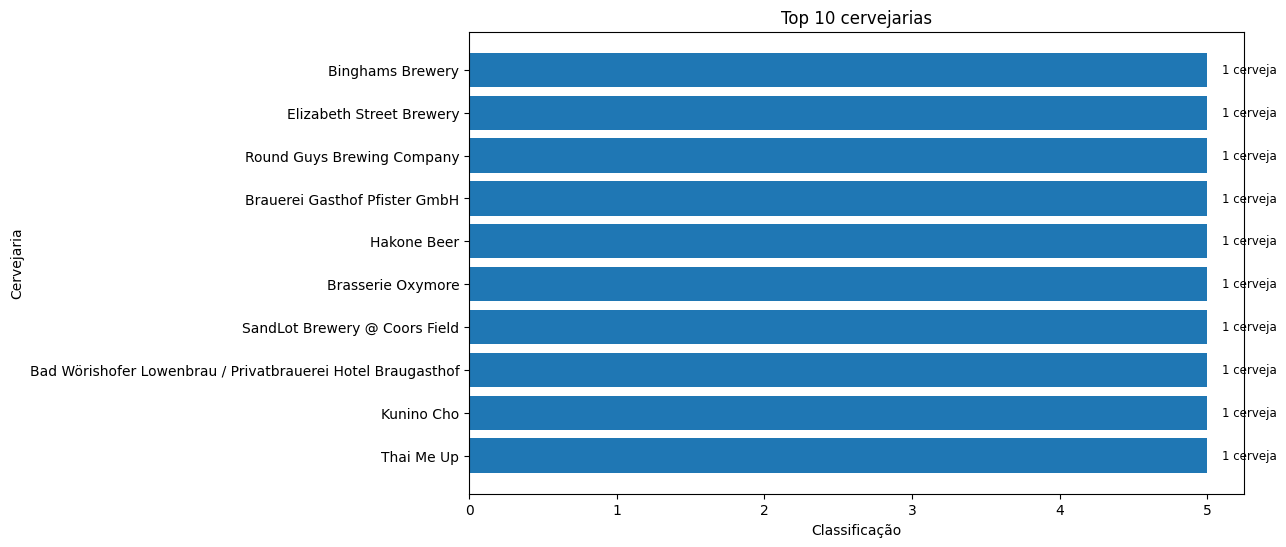

In [54]:
#dados
cervejarias = top_cervejarias['Cervejaria']
classificações = top_cervejarias['Classificação']
num_cervejas = top_cervejarias['nº de cervejas']

#plotando o gráfico 
plt.figure(figsize = (10, 6))
plt.barh(np.arange(len(cervejarias)), classificações)
for i, num_cervejas in enumerate(num_cervejas):
    plt.text(classificações[i] + 0.1, i, f"{num_cervejas} cerveja", va = 'center', ha = 'left', fontsize = 8.5)
plt.title('Top 10 cervejarias')
plt.yticks(np.arange(len(cervejarias)), cervejarias)
plt.xlabel('Classificação')
plt.ylabel('Cervejaria')
plt.show()

Investigando as características das cervejas avaliadas



In [55]:
print(cervejas_data['beer_abv'].unique().shape)
print(cervejas_data['beer_abv'].value_counts())

(530,)
5.00     109143
8.00      67744
6.00      65383
7.00      59459
9.00      59183
          ...  
7.17          1
7.74          1
17.35         1
3.53          1
0.08          1
Name: beer_abv, Length: 530, dtype: int64


In [85]:
#selecionando apenas as 250 melhores cervejas 
top_250_beers = cervejas_data.sort_values(by='review_overall', ascending=False)
top_250_cervejas = top_250_beers.head(250)


In [86]:
top_250_cervejas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 1586613 to 1233362
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              250 non-null    int64  
 1   brewery_id         250 non-null    int64  
 2   brewery_name       250 non-null    object 
 3   review_time        250 non-null    int64  
 4   review_overall     250 non-null    float64
 5   review_aroma       250 non-null    float64
 6   review_appearance  250 non-null    float64
 7   beer_style         250 non-null    object 
 8   review_palate      250 non-null    float64
 9   review_taste       250 non-null    float64
 10  beer_name          250 non-null    object 
 11  beer_abv           250 non-null    float64
 12  beer_beerid        250 non-null    int64  
dtypes: float64(6), int64(4), object(3)
memory usage: 27.3+ KB


In [87]:
top_250_cervejas.describe()

,index,brewery_id,review_time,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid
count,2.500000e+02,250.000000,2.500000e+02,250.0,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,7.990042e+05,2700.252000,1.217191e+09,5.0,3.988000,4.052000,4.176000,4.284000,6.832400,19507.124000
std,4.722225e+05,4935.608341,7.083159e+07,0.0,0.747053,0.788532,0.735655,0.686461,2.084257,21283.909705
min,2.242540e+05,45.000000,9.943620e+08,5.0,1.000000,1.000000,1.000000,1.000000,0.500000,262.000000
25%,2.263322e+05,158.000000,1.166131e+09,5.0,3.500000,3.500000,4.000000,4.000000,5.100000,976.000000
50%,8.151940e+05,342.000000,1.232905e+09,5.0,4.000000,4.000000,4.500000,4.500000,5.900000,19216.000000
75%,1.234486e+06,864.000000,1.273561e+09,5.0,4.500000,4.500000,4.500000,4.500000,9.500000,34077.750000
max,1.586613e+06,23122.000000,1.325480e+09,5.0,5.000000,5.000000,5.000000,5.000000,11.000000,73309.000000


C:\Users\Caroline\AppData\Local\Temp\ipykernel_7464\3525602860.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  teor_colors = plt.cm.get_cmap('Purples')
C:\Users\Caroline\AppData\Local\Temp\ipykernel_7464\3525602860.py:18: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


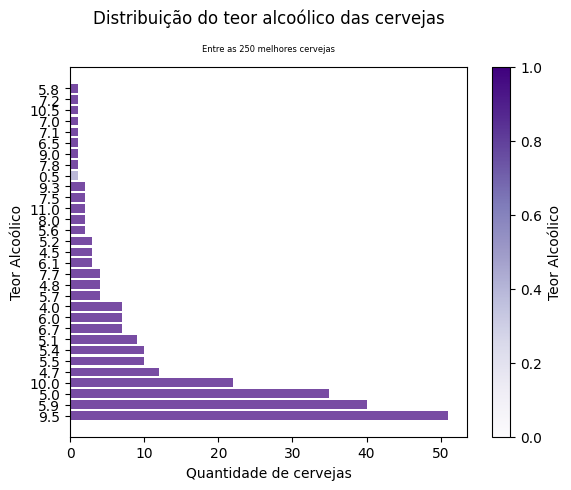

In [107]:
# Calculando a quantidade de cervejas com cada teor alcoólico
teor_alcoolico = top_250_cervejas['beer_abv'].value_counts().dropna()

# Obtendo os valores únicos do teor alcoólico e a quantidade correspondente
teor_unico = teor_alcoolico.index
quantidade = teor_alcoolico.values

# Gerando uma sequência numérica para representar os valores únicos do teor alcoólico
x = np.arange(len(teor_unico))

#escala de cores
teor_colors = plt.cm.get_cmap('Purples')

# Plotando o gráfico 
plt.barh(x, quantidade, height = 0.8, color = teor_colors(teor_unico), alpha=0.7)
# Configurando a barra de cores
sm = plt.cm.ScalarMappable(cmap = teor_colors)
cbar = plt.colorbar(sm)
cbar.set_label('Teor Alcoólico')
plt.title('Distribuição do teor alcoólico das cervejas', pad = 18, y = 1.05)
plt.text(0.5, 1.05, 'Entre as 250 melhores cervejas',
        ha ='center', va ='center', fontsize = 6, transform = plt.gca().transAxes)
plt.xlabel('Quantidade de cervejas')
plt.ylabel('Teor Alcoólico')
plt.yticks(x, teor_unico)
plt.show()


C:\Users\Caroline\AppData\Local\Temp\ipykernel_7464\2878445306.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Purples_r')


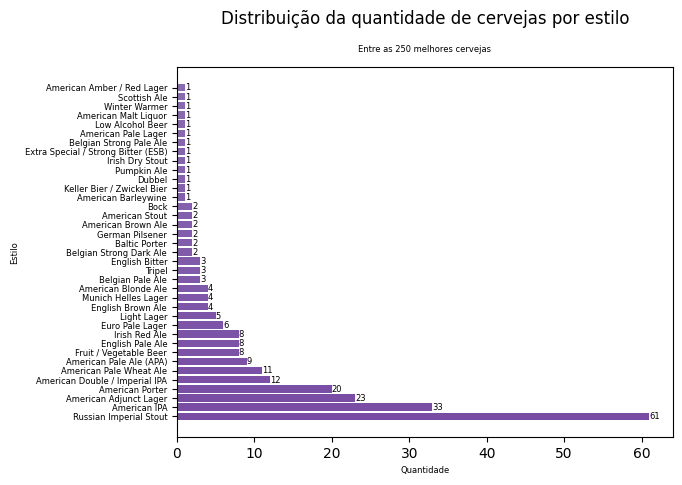

In [106]:
# Calculando a quantidade de cervejas com cada estilo
estilo = top_250_cervejas['beer_style'].value_counts().dropna()

#obtendo os valores únicos do estilo e quantidade correspondente
estilo_unico = estilo.index
quantidade = estilo.values
x = np.arange(len(estilo_unico))

# Escolhendo uma paleta de cores
cmap = plt.cm.get_cmap('Purples_r')

# Plotando o gráfico 
plt.barh(x, quantidade, height = 0.8, color = cmap(x), alpha = 0.7)
plt.title('Distribuição da quantidade de cervejas por estilo', pad = 18, y = 1.05)
plt.text(0.5, 1.05, 'Entre as 250 melhores cervejas',
        ha ='center', va ='center', fontsize = 6, transform = plt.gca().transAxes)
plt.xlabel('Quantidade', fontsize = 6)
plt.ylabel('Estilo', fontsize = 6)
plt.yticks(x, estilo_unico, fontsize = 6)
for i, v in enumerate(quantidade):
    plt.text(v, i, str(v), color ='black', va ='center', fontsize = 6)
plt.show()